In [4]:
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
# with open('./bike_test_friday.json', 'w+') as f:
#     f.write(json.dumps(bikes, sort_keys=True, indent=4))

In [4]:
# f = open('./data/bike_test_friday.json')

In [5]:
# bikes = json.load(f)

In [6]:
# print(bikes[1]['commonName'])
# for  i in bikes[1]['additionalProperties']:
#     print(i['key'], i['value'])
# print('lat', bikes[1]['lat'])
# print('long', bikes[1]['lon'])

In [7]:
# class BikeTimes():
#     def __init__(self):
#         self.date = datetime.now()
#         self.hour = self.date.hour
#         self.minute = self.date.minute
#         self.url = 'https://api.tfl.gov.uk/Place/Type/BikePoint'
#         self.data = requests.get(self.url).json()
        
#     def save_data(self):
#         with open(f'./bike_data_{self.hour}_{self.minute}', 'w+') as f:
#             f.write(json.dumps(self.data, sort_keys = True, indent = 4))
        
        

In [8]:
# BikeTimes().save_data()

In [9]:
# geo_test = requests.get(f"http://www.datasciencetoolkit.org/coordinates2statistics/{lat}%2c{lon}", params = {'statistics': 'population_density,elevation'}).json()


In [10]:
# #cols = ['name', 'num_bikes', 'num_empty', 'num_docks', 'lat', 'lon']
# bikes_list = []
# for i in range(len(bikes)):
#     name = bikes[i]['commonName']
#     time = 't1'
#     num_bikes = int(bikes[i]['additionalProperties'][-3]['value'])
#     num_empty = int(bikes[i]['additionalProperties'][-2]['value'])
#     num_docks = int(bikes[i]['additionalProperties'][-1]['value'])
#     lat = bikes[i]['lat']
#     lon = bikes[i]['lon']
#     faulty = True if num_docks - num_empty - num_bikes > 0 else False
    
# #     geo_test = requests.get(f"http://www.datasciencetoolkit.org/coordinates2statistics/{lat}%2c{lon}", params = {'statistics': 'population_density,elevation'}).json()
# #     elevation = geo_test[0]['statistics']['elevation']['value']
# #     pop_dens = geo_test[0]['statistics']['population_density']['value']
    
#     bike_dict = {'name': name,
#                  'time': time,
#                  'num_bikes': num_bikes,
#                  'num_empty': num_empty,
#                  'num_docks': num_docks,
#                  'coords': (lat,lon),
#                  'faulty': faulty}
    
#     bikes_list.append(bike_dict)

In [11]:
# bikes_df = pd.DataFrame(bikes_list)

In [12]:
# # Dont need to run this! Just use the pickle

# geo_list = []
# for bike in bikes_list:
#     lat = bike['coords'][0]
#     lon = bike['coords'][1]
#     geo_test = requests.get(f"http://www.datasciencetoolkit.org/coordinates2statistics/{lat}%2c{lon}", params = {'statistics': 'population_density,elevation'}).json()
#     elevation = geo_test[0]['statistics']['elevation']['value']
#     pop_dens = geo_test[0]['statistics']['population_density']['value']
#     geo_dict = {'coords': bike['coords'],
#                'elevation': elevation,
#                'pop_dens': pop_dens}
#     geo_list.append(geo_dict)

In [13]:
# dont run!
# pop_75 = geo_df.pop_dens.quantile(0.75)

In [14]:
# pop_mean

In [15]:
# geo_df = pd.DataFrame(geo_list).set_index('coords')

In [16]:
# geo_df['high_pop?'] = geo_df.pop_dens > pop_75

In [17]:
# # Hill finder

# hill_list = []
# for n in range(len(geo_df)):
#     lat_n = geo_df.index[n][0]
#     lon_n = geo_df.index[n][1]
# #     print (lat_n,lon_n)
#     elev_list = []
#     for i in range(len(geo_df)):
#         lat_i = geo_df.index[i][0]
#         lon_i = geo_df.index[i][1]
# #         print(lat_i,lon_i)
#         bol = ((lat_n-lat_i)**2 + (lon_n - lon_i)**2 < 0.000005)
#         if bol:
#             elev_list.append(geo_df.iloc[i].elevation)
#     hill = (geo_df.iloc[n].elevation > np.mean(elev_list))
#     hill_list.append(hill)

In [18]:
# hill_list[:5]

In [19]:
# geo_df['hill'] = hill_list

In [20]:
# geo_df.head()

In [21]:
# geo_df.to_pickle('geo_dataframe')

In [5]:
geo_df = pd.read_pickle('geo_dataframe')

In [6]:
geo_df.head()

,elevation,pop_dens,high_pop?,hill
coords,,,,
"(51.529163, -0.10997)",31,10010,False,False
"(51.499606, -0.197574)",17,11436,True,False
"(51.521283, -0.084605)",27,10010,False,False
"(51.530059, -0.120973)",22,10010,False,True
"(51.507385, -0.09644)",16,10010,False,False


In [24]:
# bikes_df = bikes_df.join(geo_df, on = 'coords')

In [25]:
# bikes_df.coords[0][0]

In [26]:
# faulty_list = []
# for n in range(len(bikes_df)):
#     lat_n = bikes_df.coords[n][0]
#     lon_n = bikes_df.coords[n][1]
#     faulty_near = 0
#     for i in range(len(geo_df)):
#         lat_i = bikes_df.coords[i][0]
#         lon_i = bikes_df.coords[i][1]
#         bol = ((lat_n-lat_i)**2 + (lon_n - lon_i)**2 < 0.000005)
#         if bol:
#             faulty_near += 1
#     faulty_list.append(faulty_near)

In [27]:
# bikes_df['num_faulty_near'] = faulty_list

In [28]:
# bikes_df['faulty_near'] = (bikes_df['num_faulty_near'] >= 2)

In [6]:
# bikes_df['num_faulty'] = bikes_df['num_docks'] - bikes_df['num_empty'] - bikes_df['num_bikes']

In [8]:
# bikes_df.to_pickle('bikes_dataframe')

In [7]:
bikes_df = pd.read_pickle('bikes_dataframe')

In [8]:
bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near,faulty_near,num_faulty
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False,1,False,0
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,1,False,0
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False,3,True,1
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True,3,True,0
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False,1,False,0


In [13]:
bikes_df['coords'][0]

(51.529163, -0.10997)

In [32]:
# We think we'll only get a small effect sizes so we explore what it a good number of times to take samples

from statsmodels.stats.power import tt_solve_power
for i in [0.10, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    n = int(tt_solve_power(alpha=0.05, effect_size= i, power=0.8))
    print("For an effect size of {} we need to sample {} times".format(i,n))

For an effect size of 0.1 we need to sample 786 times
For an effect size of 0.15 we need to sample 350 times
For an effect size of 0.2 we need to sample 198 times
For an effect size of 0.25 we need to sample 127 times
For an effect size of 0.3 we need to sample 89 times
For an effect size of 0.35 we need to sample 66 times
For an effect size of 0.4 we need to sample 51 times
For an effect size of 0.45 we need to sample 40 times
For an effect size of 0.5 we need to sample 33 times


In [33]:
# 1
# H0 = Faulty bikepoints have the same number of faulty bikepoints near-by as non-faulty bikepoints
# H1 = Faulty bikepoints have more likely to have more than 1 faulty bikepoints near them than non-faulty bikepoints

In [34]:
# Non-faulty counts

(bikes_df.loc[bikes_df['faulty'] == False].faulty_near).value_counts()

False    270
True     243
Name: faulty_near, dtype: int64

In [35]:
# Faulty counts

(bikes_df.loc[bikes_df['faulty'] == True].faulty_near).value_counts()

False    151
True     116
Name: faulty_near, dtype: int64

In [36]:
faulty_bikes_df = bikes_df.loc[bikes_df['faulty'] == True]
non_faulty_bikes_df = bikes_df.loc[bikes_df['faulty'] == False]

In [37]:
# Dataframe of subsamples

display(faulty_bikes_df.head(), len(faulty_bikes_df))

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near,faulty_near
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False,3,True
7,"Malet Street, Bloomsbury",t1,43,5,49,"(51.52168, -0.130431)",True,35,9279,False,False,1,False
9,"Belgrove Street , King's Cross",t1,24,16,48,"(51.529943, -0.123616)",True,24,10010,False,True,2,True
15,"Drummond Street , Euston",t1,16,10,28,"(51.527326, -0.136052)",True,28,9279,False,False,2,True
17,"Doric Way , Somers Town",t1,2,44,50,"(51.528833, -0.13225)",True,30,9279,False,False,2,True


267

In [38]:
display(non_faulty_bikes_df.head(), len(non_faulty_bikes_df))

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near,faulty_near
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False,1,False
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,1,False
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True,3,True
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False,1,False
5,"Park Street, Bankside",t1,18,0,18,"(51.505974, -0.092754)",False,8,10010,False,False,2,True


513

In [39]:
# Taking our effect size to be 0.2 we need to sample 198 times

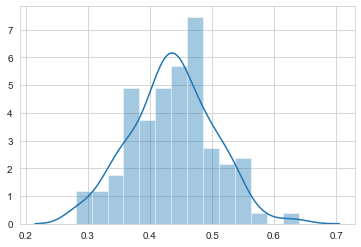

In [40]:
# Sample the bikespoints that are faulty
 
import scipy.stats
np.random.seed(3)
probs1_subsample1 = []
for i in range(198):
    sample = faulty_bikes_df.sample(n=50, replace = True)
    p = np.sum(sample.faulty_near)/50
    probs1_subsample1.append(p)

sns.distplot(probs1_subsample1, norm_hist= True)

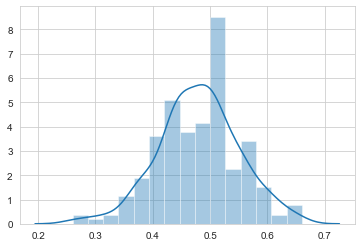

In [41]:
# Sample the non-faulty bikepoints

np.random.seed(3)
probs1_subsample2 = []
for i in range(198):
    sample = non_faulty_bikes_df.sample(n=50, replace = True)
    p = np.sum(sample.faulty_near)/50
    probs1_subsample2.append(p)


sns.distplot(probs1_subsample2, norm_hist= True)

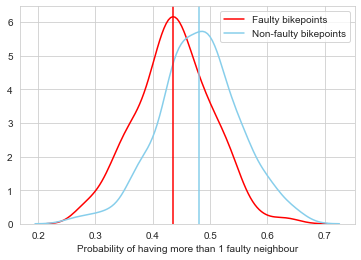

In [42]:
sns.distplot(probs1_subsample1, hist=False, norm_hist=True, label='Faulty bikepoints', color='red')
sns.distplot(probs1_subsample2, hist=False, norm_hist=True, label='Non-faulty bikepoints', color='skyblue')
plt.axvline(x = np.mean(probs1_subsample1), color='red')
plt.axvline(x = np.mean(probs1_subsample2), color='skyblue')
plt.xlabel('Probability of having more than 1 faulty neighbour')
plt.legend();

In [43]:
print('Faulty var = {}'.format(np.var(probs1_subsample1)) + '\nNon-faulty var = {}'.format(np.var(probs1_subsample2)))

Faulty var = 0.004447801244770941
Non-faulty var = 0.004943424140393838


In [44]:
# Need to take the ratio of the vars to see if they're close enough for a t test

np.var(probs1_subsample1)/np.var(probs1_subsample2)

0.899740972745379

In [45]:
scipy.stats.ttest_ind(probs1_subsample1, probs1_subsample2)

Ttest_indResult(statistic=-6.407828758218733, pvalue=4.217402024387721e-10)

In [46]:
# 2) Bikepoints at a high elevation are smaller.
# H0 = Bikepoints on hills have the same number of docks as bikepoints that are not on hills
# H1= Bikepoints on hills have fewer docks than bikepoints that are not on hills

In [47]:
# Need a hill dataframe and a non-hill dataframe

hill_bikes_df = bikes_df.loc[bikes_df['hill'] == True]
no_hill_bikes_df = bikes_df.loc[bikes_df['hill'] == False]
display(hill_bikes_df.head(), len(hill_bikes_df))

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near,faulty_near
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True,3,True
8,"Scala Street, Fitzrovia",t1,13,8,21,"(51.519914, -0.136039)",False,37,9279,False,True,3,True
9,"Belgrove Street , King's Cross",t1,24,16,48,"(51.529943, -0.123616)",True,24,10010,False,True,2,True
10,"Great Russell Street, Bloomsbury",t1,15,11,26,"(51.517727, -0.127854)",False,37,9279,False,True,2,True
12,"Hatton Wall, Holborn",t1,10,16,26,"(51.521661, -0.109006)",False,25,10010,False,True,2,True


139

In [48]:
display(no_hill_bikes_df.head(), len(no_hill_bikes_df))

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near,faulty_near
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False,1,False
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,1,False
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False,3,True
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False,1,False
5,"Park Street, Bankside",t1,18,0,18,"(51.505974, -0.092754)",False,8,10010,False,False,2,True


641

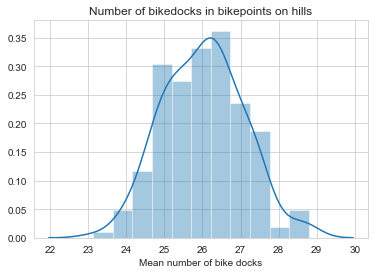

In [49]:
# Sample the mean number of docks from bikespoints that are on a hill
 
np.random.seed(3)
probs2_subsample1 = []
for i in range(198):
    sample = hill_bikes_df.sample(n=50, replace = True)
    docks = sample.num_docks
    probs2_subsample1.append(np.mean(docks))

sns.distplot(probs2_subsample1, norm_hist= True)
plt.xlabel('Mean number of bike docks')
plt.title('Number of bikedocks in bikepoints on hills');

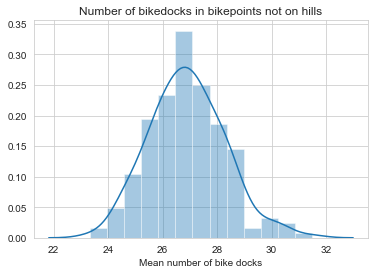

In [50]:
# Sample the mean number of docks from bikespoints that are not on a hill
 
np.random.seed(3)
probs2_subsample2 = []
for i in range(198):
    sample = no_hill_bikes_df.sample(n=50, replace = True)
    docks = sample.num_docks
    probs2_subsample2.append(np.mean(docks))

sns.distplot(probs2_subsample2, norm_hist= True)
plt.xlabel('Mean number of bike docks')
plt.title('Number of bikedocks in bikepoints not on hills');

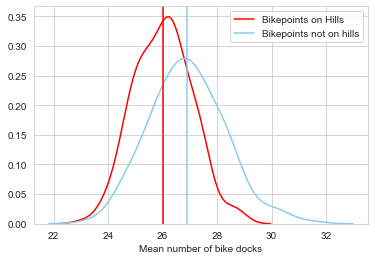

In [51]:
sns.distplot(probs2_subsample1, hist=False, norm_hist=True, label='Bikepoints on Hills', color='red')
sns.distplot(probs2_subsample2, hist=False, norm_hist=True, label='Bikepoints not on hills', color='skyblue')
plt.axvline(x = np.mean(probs2_subsample1), color='red')
plt.axvline(x = np.mean(probs2_subsample2), color='skyblue')
plt.xlabel('Mean number of bike docks')
plt.legend();

In [52]:
# Test the relative variences

print('hill var = {}'.format(np.var(probs2_subsample1)) + '\nno hill var = {}'.format(np.var(probs2_subsample2)))

hill var = 1.1002545046423833
no hill var = 1.8982498214467909


In [53]:
# Need to take the ratio of the vars to see if they're close enough for a t test

np.var(probs2_subsample1)/np.var(probs2_subsample2)

0.5796152288342118

In [54]:
scipy.stats.ttest_ind(probs2_subsample1, probs2_subsample2, equal_var=False)

Ttest_indResult(statistic=-7.151686819024998, pvalue=4.657931549223401e-12)